# Feature Extraction from images

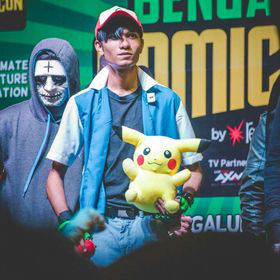

In [1]:
from PIL import Image
from array import array
%matplotlib inline  

#Import an image
image = Image.open("tanush.jpg")

image

## 1. Basic Features

### Binarizing and Blurring
In images, some frequently used techniques for feature extraction are binarizing and blurring

Binarizing: converts the image array into 1s and 0s. This is done while converting the image to a 2D image. Even gray-scaling can also be used. It gives you a numerical matrix of the image. Grayscale takes much lesser space when stored on Disc.

### 1.1 Binarizing

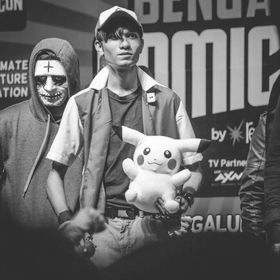

In [8]:
im = image.convert('L')

im

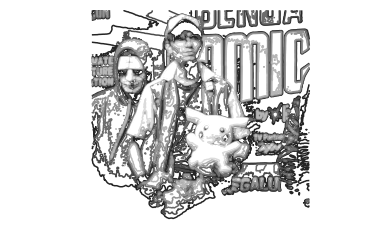

<Figure size 432x288 with 0 Axes>

In [9]:
from pylab import *

# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')

figure()
show()

### 1.2 Blurring: 

Blurring algorithm takes weighted average of neighbouring pixels to incorporate surroundings color into every pixel. It enhances the contours better and helps in understanding the features and their importance better.

And this is how you do it in Python:



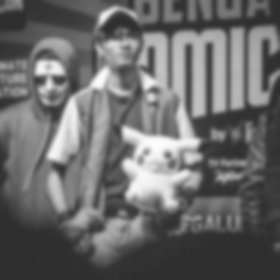

<Figure size 432x288 with 0 Axes>

In [12]:
from PIL import *
import ImageFilter

figure()
p = image.convert("L").filter(ImageFilter.GaussianBlur(radius = 2))
p

So, these are some ways in which you can do feature engineering. And for advanced methods, you have to understand the basics of Computer Vision and neural networks, and also the different types of filters and their significance and the math behind them.

## 2. Edge Datection

Importing the images and their respective libraries

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('tanush.jpg',0)

### 2.1 Canny Edge Detection in OpenCV

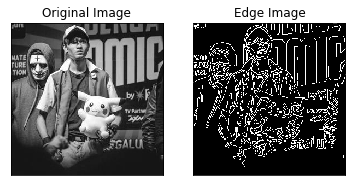

In [15]:
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### 2.2 Sobel Edge Detection using OpenCV

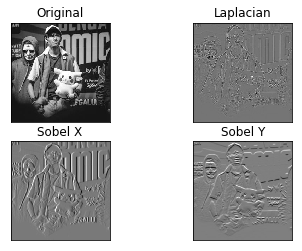

In [8]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## 3. Corner Detection

### 3.1 Harris Corner Detector in OpenCV

OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :

img - Input image, it should be grayscale and float32 type.
blockSize - It is the size of neighbourhood considered for corner detection
ksize - Aperture parameter of Sobel derivative used.
k - Harris detector free parameter in the equation.

In [ ]:
import cv2
import numpy as np

filename = 'tanush.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(img)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)

### 3.2 Shi-Tomasi Corner Detector & Good Features to Track¶
OpenCV has a function, cv2.goodFeaturesToTrack(). It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

With all these informations, the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corner, throws away all the nearby corners in the range of minimum distance and returns N strongest corners.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('tanush.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()


## 4. Blob Detection


Blobs are bright on dark or dark on bright regions in an image. In
this example, blobs are detected using 3 algorithms. The image used
in this case is the Hubble eXtreme Deep Field. Each bright dot in the
image is a star or a galaxy.

### 4.1 Laplacian of Gaussian (LoG)

This is the most accurate and slowest approach. It computes the Laplacian
of Gaussian images with successively increasing standard deviation and
stacks them up in a cube. Blobs are local maximas in this cube. Detecting
larger blobs is especially slower because of larger kernel sizes during
convolution. Only bright blobs on dark backgrounds are detected. See
:py:meth:`skimage.feature.blob_log` for usage.

### 4.2 Difference of Gaussian (DoG)

This is a faster approximation of LoG approach. In this case the image is
blurred with increasing standard deviations and the difference between
two successively blurred images are stacked up in a cube. This method
suffers from the same disadvantage as LoG approach for detecting larger
blobs. Blobs are again assumed to be bright on dark. See
:py:meth:`skimage.feature.blob_dog` for usage.

### 4.3 Determinant of Hessian (DoH)

This is the fastest approach. It detects blobs by finding maximas in the
matrix of the Determinant of Hessian of the image. The detection speed is
independent of the size of blobs as internally the implementation uses
box filters instead of convolutions. Bright on dark as well as dark on
bright blobs are detected. The downside is that small blobs (<3px) are not
detected accurately. See :py:meth:`skimage.feature.blob_doh` for usage.



In [3]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import cv2

import matplotlib.pyplot as plt


#image = data.hubble_deep_field()[0:500, 0:500]
image = cv2.imread('tanush.jpg')
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

<Figure size 900x300 with 3 Axes>

## 5. Ridge Detection

Ridges are eigenvalues of matrix of second order derivate of image, also known as hessian matrix.

In [11]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import cv2

def detect_ridges(gray, sigma=3.0):
    hxx, hyy, hxy = hessian_matrix(gray, sigma)
    i1, i2 = hessian_matrix_eigvals(hxx, hxy, hyy)
    cv2.imshow('1',i1)
    return i1, i2
    i1
    i2

image = cv2.imread('tanush.jpg')
gray = rgb2gray(image)

detect_ridges(gray)

(array([[ 5.13541188e-03,  5.10139082e-03,  4.96815476e-03, ...,
         -4.67271062e-05, -4.67028895e-04, -7.03981384e-04],
        [ 4.98705200e-03,  4.92416450e-03,  4.75722856e-03, ...,
         -9.46297613e-05, -6.65021158e-04, -1.06664922e-03],
        [ 4.59357173e-03,  4.46534808e-03,  4.20945371e-03, ...,
          1.26438676e-05, -6.32393659e-04, -1.18474493e-03],
        ...,
        [-9.23173194e-04, -1.19665519e-04,  1.10389679e-03, ...,
          3.46469593e-03,  2.95039353e-03,  2.57072218e-03],
        [-8.62170777e-04, -2.09116729e-04,  9.06461162e-04, ...,
          3.62890398e-03,  3.28879555e-03,  3.01850382e-03],
        [-5.78607489e-04, -1.32239940e-04,  7.59604732e-04, ...,
          3.49512627e-03,  3.32180272e-03,  3.16128439e-03]]),
 array([[-0.0006454 , -0.0007967 , -0.00106814, ..., -0.00377428,
         -0.00356254, -0.00328226],
        [-0.00108494, -0.00136648, -0.00186665, ..., -0.00450594,
         -0.00397887, -0.00336685],
        [-0.0016392 , -0.